#                                                       Networkx


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
G = nx.Graph()
G.add_edge(1,2, weight = 3)
G.add_edge(2,3)
G.add_edge(2,4)

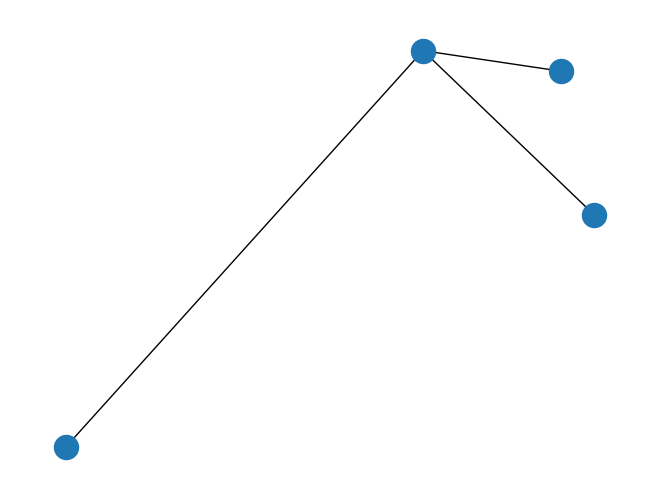

In [3]:
nx.draw(G, pos=nx.random_layout(G))

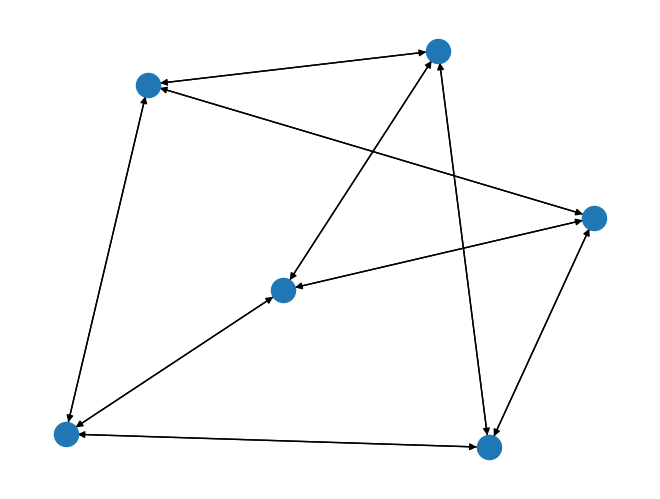

In [4]:
A = nx.planted_partition_graph(2, 3, 0, 1, directed=True)
nx.draw(A, pos=nx.spring_layout(A))

In [5]:
nx.bipartite.sets(A)

({0, 1, 2}, {3, 4, 5})

In [6]:
def random_tripartite_graph(n1 : int, n2 : int, n3 : int, p : float):
    'Return a (n1, n2, n3) tripartite graph with edge probability p'
    A1 = nx.bipartite.random_graph(n1, n2, p)
    A2 = list(range(n1+n2, n1+n2+n3))

    G = nx.Graph()
    G.add_nodes_from(A1.nodes())
    G.add_edges_from(A1.edges())
    G.add_nodes_from(A2)
    
    for _, s in A1.edges():
        for v in A2:
            a = random.random()
            if a < p : G.add_edge(s, v)
    
    return G

In [7]:
def tripartite_layout_color(G, partition : list):
    "Return an adequate pos for tripartite, so len(partition) = 3"
    offset = [0, sum(partition[:1]), sum(partition[:2]), sum(partition)]
    classes = ['P', 'S', 'C']
    pos = dict()
    C = ['red', 'blue', 'green']
    color = list()
    for i in range(3):
        for nodes in [nodes for nodes in G.nodes() if nodes < offset[i+1] and nodes >= offset[i]]:
            G.nodes[nodes]['layer'] = classes[i]
            pos[nodes] = (nodes - offset[i], 2-i)
            color.append(C[i])

    return pos, color

In [8]:
def charge_attribute(G, C):
    'attribute a charge to each client node'
    i = 0
    for nodes in G.nodes():
        if G.nodes[nodes]['layer'] == 'C':
            G.nodes[nodes]['charge'] = C[i]
            i += 1
        else :
            G.nodes[nodes]['charge'] = 0

{0: Text(0, 2.12, '0'),
 1: Text(1, 2.12, '0'),
 2: Text(2, 2.12, '0'),
 3: Text(0, 1.12, '0'),
 4: Text(1, 1.12, '0'),
 5: Text(2, 1.12, '0'),
 6: Text(3, 1.12, '0'),
 7: Text(4, 1.12, '0'),
 8: Text(5, 1.12, '0'),
 9: Text(6, 1.12, '0'),
 10: Text(7, 1.12, '0'),
 11: Text(0, 0.12, '13.0'),
 12: Text(1, 0.12, '40.0'),
 13: Text(2, 0.12, '99.3'),
 14: Text(3, 0.12, '34'),
 15: Text(4, 0.12, '190')}

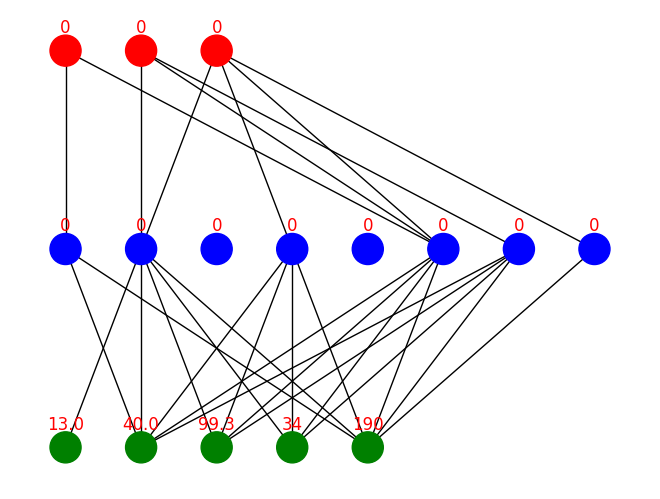

In [9]:
n1, n2, n3 = 3, 8, 5
p = 0.5
C = [13., 40., 99.3, 34, 190]
G = random_tripartite_graph(n1, n2, n3, p)
partition = [n1, n2, n3]
pos, node_color = tripartite_layout_color(G, partition)
charge_attribute(G, C)
pos_label = {node : (x, y + 0.12) for node, (x, y) in pos.items()}
attributes = {nodes : G.nodes[nodes]['charge'] for nodes in G.nodes()}
nx.draw(G, pos=pos, node_color=node_color, node_size=500)
nx.draw_networkx_labels(G, pos=pos_label, labels=attributes, font_color='red')

In [10]:
print([(node, list(G.adj[node].keys())) for node in G.nodes if G.nodes[node]['layer'] == 'C'])

[(11, [4]), (12, [3, 8, 4, 9, 6]), (13, [8, 4, 9, 6]), (14, [4, 8, 9, 6]), (15, [3, 4, 9, 6, 8, 10])]


# Evolution of the graph from an initial state

In [11]:
def evolution(G, i):
    """Works on tripartite graph with initial charges for clients (third group)
    distribution of charge equally along neighboring switches, and therefore producers"""
    Step = ['C', 'S', 'P']
    C_adj = [(node, list(G.adj[node].keys())) for node in G.nodes if G.nodes[node]['layer'] == Step[i]]
    for node, neighbors in C_adj:
        neighbors_plus = [a for a in neighbors if G.nodes[a]['layer'] == Step[i+1]]
        m = len(neighbors_plus)
        for a in neighbors_plus :
            G.nodes[a]['charge'] += G.nodes[node]['charge']/m
            G.nodes[a]['charge'] = round(G.nodes[a]['charge'], 2)
        G.nodes[node]['charge'] = 0

    

{0: Text(0, 2.12, '0'),
 1: Text(1, 2.12, '0'),
 2: Text(2, 2.12, '0'),
 3: Text(0, 1.12, '39.67'),
 4: Text(1, 1.12, '86.0'),
 5: Text(2, 1.12, '0'),
 6: Text(3, 1.12, '73.0'),
 7: Text(4, 1.12, '0'),
 8: Text(5, 1.12, '73.0'),
 9: Text(6, 1.12, '73.0'),
 10: Text(7, 1.12, '31.67'),
 11: Text(0, 0.12, '0'),
 12: Text(1, 0.12, '0'),
 13: Text(2, 0.12, '0'),
 14: Text(3, 0.12, '0'),
 15: Text(4, 0.12, '0')}

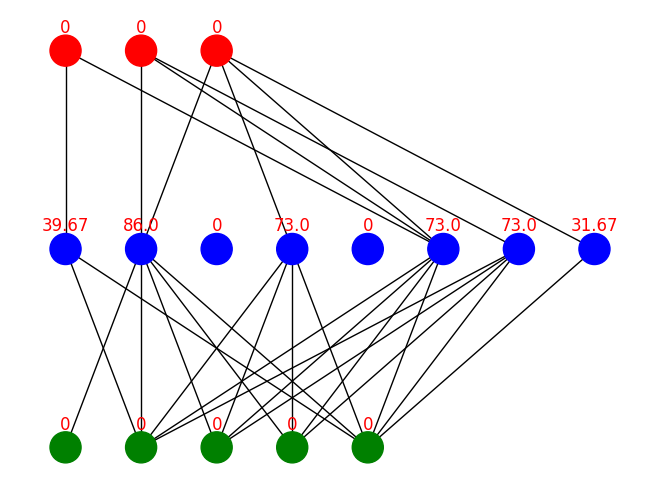

In [12]:
evolution(G,0)
pos_label = {node : (x, y + 0.12) for node, (x, y) in pos.items()}
attributes = {nodes : G.nodes[nodes]['charge'] for nodes in G.nodes()}
nx.draw(G, pos=pos, node_color=node_color, node_size=500)
nx.draw_networkx_labels(G, pos=pos_label, labels=attributes, font_color='red')

In [13]:
print((sum(C)-sum([G.nodes[a]['charge'] for a in G.nodes if G.nodes[a]['layer'] == 'S']))<1e-1)

True


{0: Text(0, 2.12, '64.0'),
 1: Text(1, 2.12, '140.33'),
 2: Text(2, 2.12, '172.0'),
 3: Text(0, 1.12, '0'),
 4: Text(1, 1.12, '0'),
 5: Text(2, 1.12, '0'),
 6: Text(3, 1.12, '0'),
 7: Text(4, 1.12, '0'),
 8: Text(5, 1.12, '0'),
 9: Text(6, 1.12, '0'),
 10: Text(7, 1.12, '0'),
 11: Text(0, 0.12, '0'),
 12: Text(1, 0.12, '0'),
 13: Text(2, 0.12, '0'),
 14: Text(3, 0.12, '0'),
 15: Text(4, 0.12, '0')}

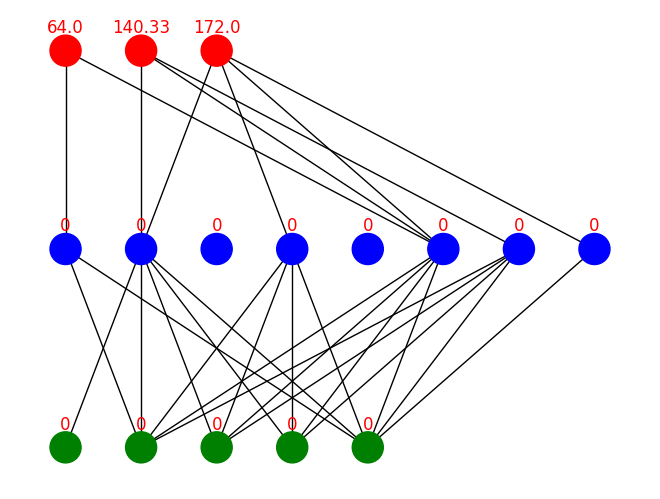

In [14]:
evolution(G,1)
attributes = {nodes : G.nodes[nodes]['charge'] for nodes in G.nodes()}
nx.draw(G, pos=pos, node_color=node_color, node_size=500)
nx.draw_networkx_labels(G, pos=pos_label, labels=attributes, font_color='red')

In [15]:
print(abs(sum(C)-sum([G.nodes[a]['charge'] for a in G.nodes if G.nodes[a]['layer'] == 'P']))<1e-1)

True


# Now we need a metric, a distance, a score !

Our metric is the standard deviation of each the producers charges.
We first need to define our variables.
We'll work with $x_s$ which equals 1 if switch s is on, 0 otherwise.

In [50]:
def switches_vars(G):
    switch_index = [node for node in G.nodes if G.nodes[node]['layer'] == 'S']
    Xs = {node : 1 for node in switch_index}
    return switch_index, Xs

In [51]:
def clients_index(G):
    clients_index = [node for node in G.nodes if G.nodes[node]['layer'] == 'C']
    
    return clients_index

In [52]:
def delta_var(G):
    clients = {node : list(G.adj[node].keys()) for node in G.nodes if G.nodes[node]['layer'] == 'C'}
    delta = {(c, i) : 0 for c in clients for i in range(1, len(clients[c] + 1))}
    for c in clients:
        delta[(c, len(clients[c]))] = 1
    return delta

In [41]:
def optimization_step(X):
    a = random.randint(0, len(X)-1)
    X[a] = 1 - X[a]
    return X

[1, 1, 0, 0, 0]

In [45]:
[i for i in range(1, 4) for j in range(i)]

[1, 2, 2, 3, 3, 3]

In [55]:
list({1 : 'a', 4 : 'b', 3 : 'fj'}.values())

['a', 'b', 'fj']

In [61]:
[1 for i, j in [(1,2), (3,4)]]

[1, 1]

In [63]:
def obj_func_vars_initialize(G):
    Xs = switches_vars(G)[1]
    delta = delta_var(G)
    product = {(s, c ,i) : Xs[s]*delta[(c, i)] for s in range(len(Xs)) for c, i in delta}
    return Xs, delta, product

def obj_func(G, Xs, delta, product):
    Clients_charges = {node : G.nodes[node]['charge'] for node in G.nodes if G.nodes[node]['layer'] == 'C'}
    Producers = [node for node in G.nodes if G.nodes[node]['layer'] == 'P'] 
    NeighborsP = {node : list(G.adj[node].keys()) for node in G.nodes if G.nodes[node]['layer'] == 'P'} 
    NeighborsC = {node : list(G.adj[node].keys()) for node in G.nodes if G.nodes[node]['layer'] == 'C'}
    NeighborsS_C = {node : [a for a in list(G.adj[node].keys()) if G.nodes[a]['layer'] == 'C'] for node in G.nodes if G.nodes[node]['layer'] == 'S'}
    NeighborsS_P = {node : [a for a in list(G.adj[node].keys()) if G.nodes[a]['layer'] == 'P'] for node in G.nodes if G.nodes[node]['layer'] == 'S'}
    load_p = {producer : sum([sum([sum([Clients_charges[c]['charge']*product[(s, c, i)]/(i*len(NeighborsS_P[s])) for _, i in delta]) for c in NeighborsS_C[s]]) for s in NeighborsP[p]]) for producer in Producers}
    avg_load_p = sum({list(load_p.values)})/len(load_p)
    obj1 = sum([(load_p[producer] - avg_load_p)**2 for producer in load_p])
    obj2 = sum([2*product[s, c, i] - product[s, c, i]*(Xs[s]+delta([c, i])) for s, c ,i in product])
    obj3 = sum([sum([product([s, c, i]) for s in NeighborsC[c]])*(1-2*i + sum([Xs[s] for s in NeighborsC[c]])) for c, i in delta])
    obj4 = sum([(1-sum([delta[c, i]] for i in range(1, len(NeighborsC[c] + 1))))**2 for c in G.nodes if G.nodes[c]['layer'] == 'C'])

    return obj1 + obj2 + obj3 + obj4


